In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("/content/drive/MyDrive/ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [4]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


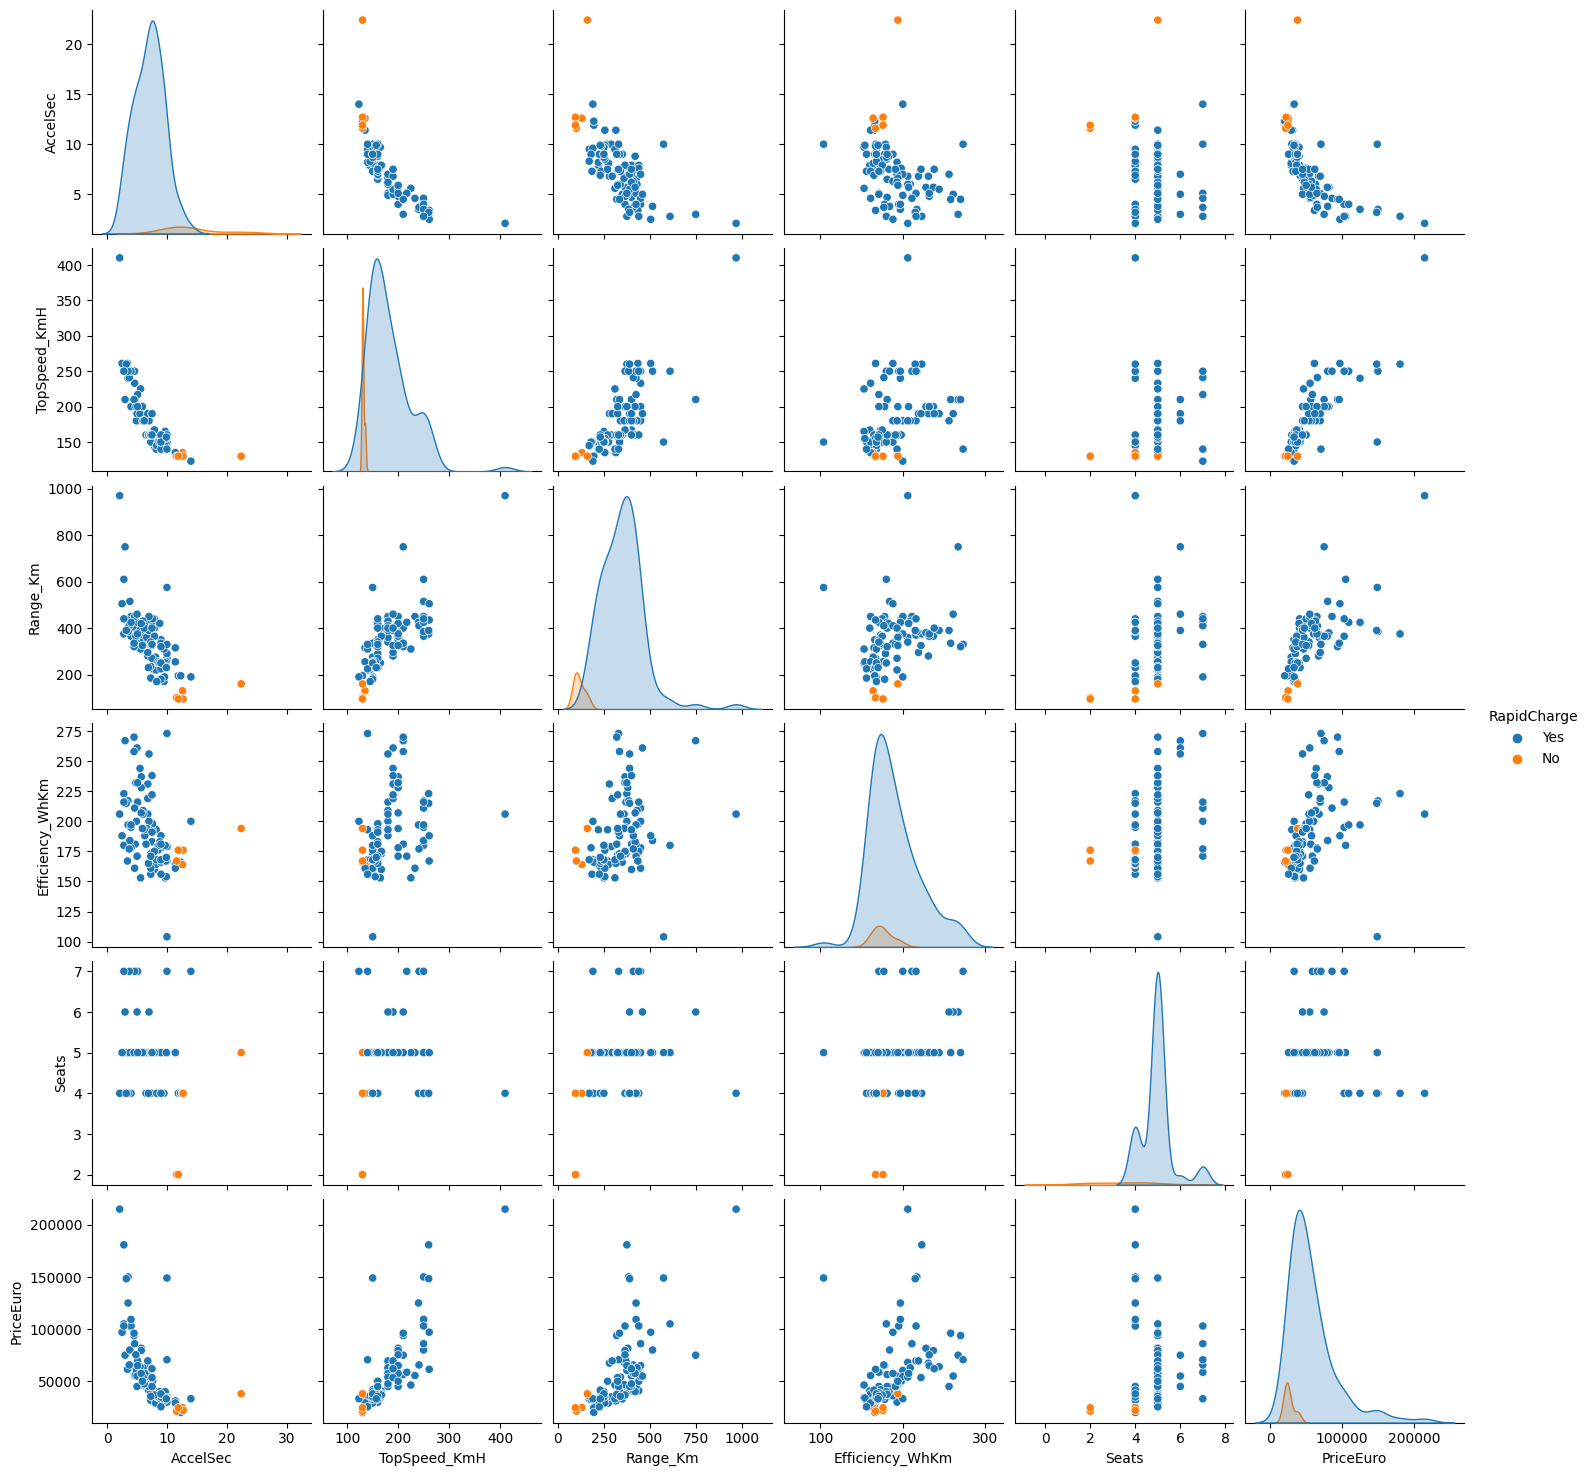

In [6]:
sb.pairplot(df,hue='RapidCharge')

<ipython-input-15-2d7d64c7912a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

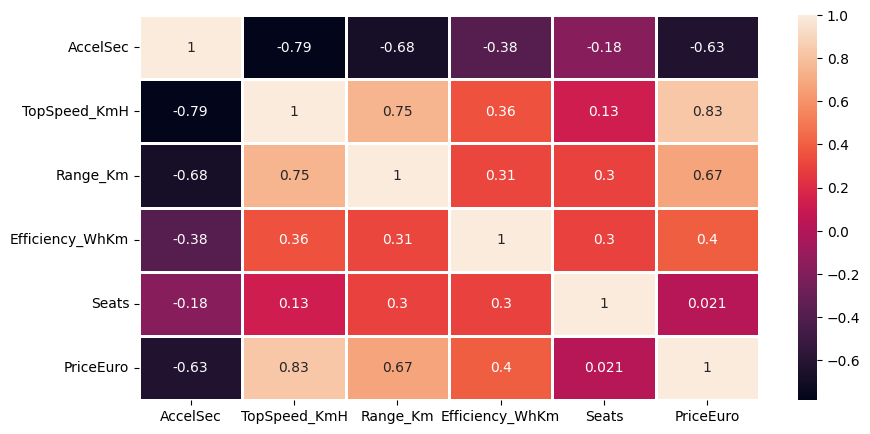

In [15]:
ax=plt.figure(figsize=(10,5))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

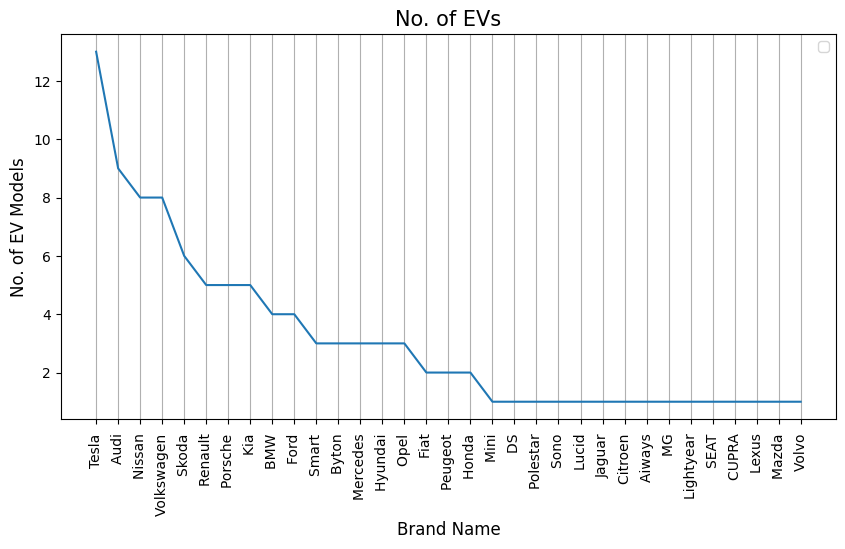

In [16]:
# Total number of models from respected brand

plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.grid(axis="x")
plt.legend()
plt.xlabel("Brand Name",fontsize=12)
plt.ylabel("No. of EV Models",fontsize=12)
plt.title('No. of EVs',fontsize=15)
plt.plot(df['Brand'].value_counts(), label='No. of Models')
plt.show()

There are more number of models available at tesla,audi,nissan,volkswagen and skoda so we can say that they have enough experience and updated EV

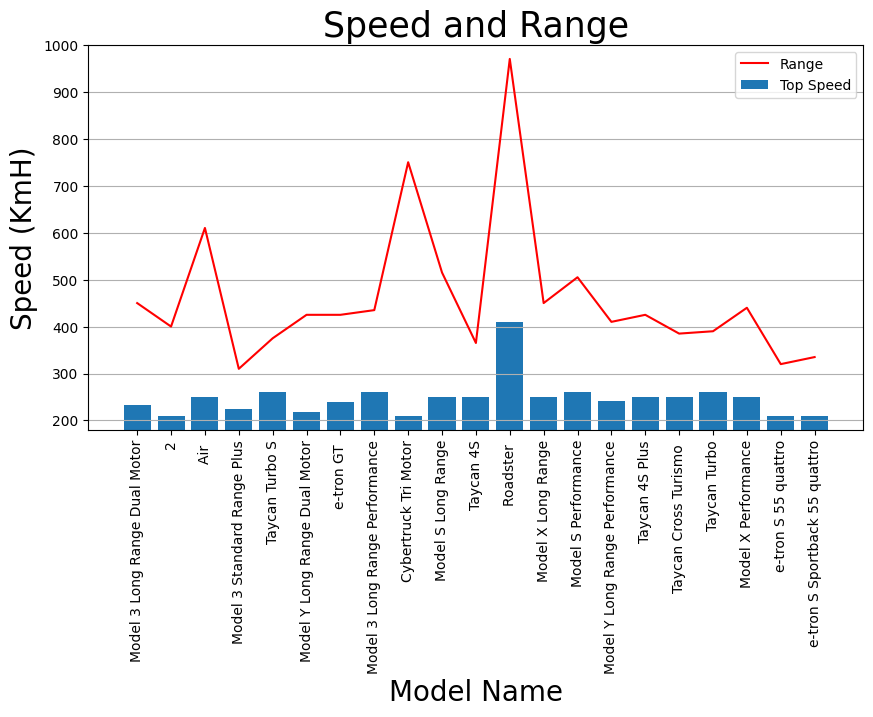

In [18]:
# Top Speed and Range filtration

df2 = df[df['TopSpeed_KmH']>200]

plt.figure(figsize=(10,5))
plt.title("Speed and Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=180,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Speed (KmH)",fontsize=20)
plt.bar(df2['Model'],df2['TopSpeed_KmH'],label='Top Speed')
plt.plot(df2['Model'],df2['Range_Km'],label='Range',c='r')
plt.legend()

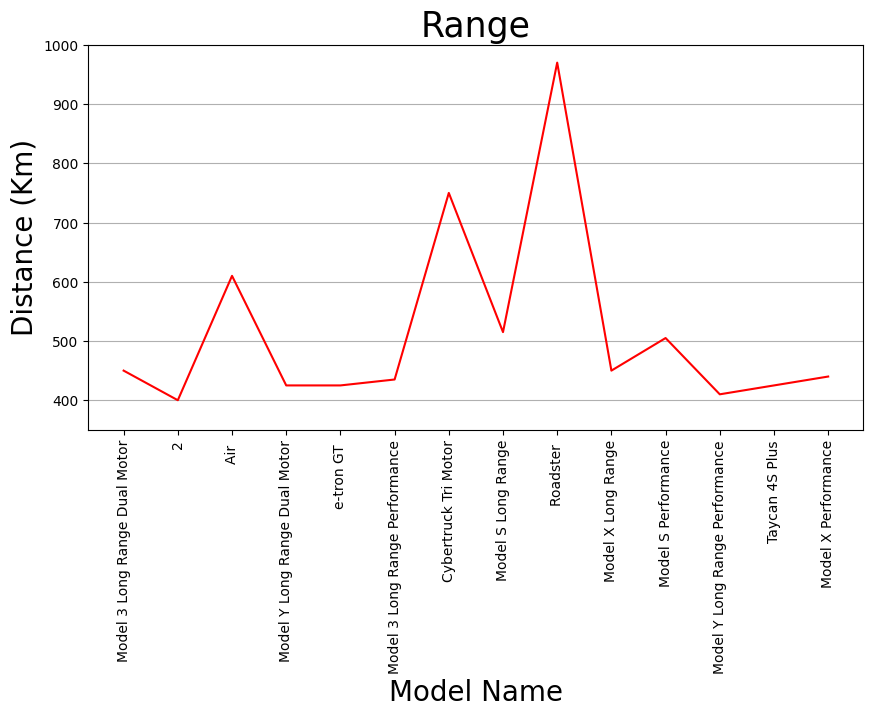

In [17]:
# Filteration of models related to Range
df3 = df2[df2['Range_Km']>=400] # Range above 400 km

plt.figure(figsize=(10,5))
plt.title("Range",fontsize=25)
plt.grid(axis='y')
plt.ylim(bottom=350,top=1000)
plt.xticks(rotation = 90)
plt.xlabel("Model Name",fontsize=20)
plt.ylabel("Distance (Km)",fontsize=20)
plt.plot(df3['Model'],df3['Range_Km'],label='Range',c='r')

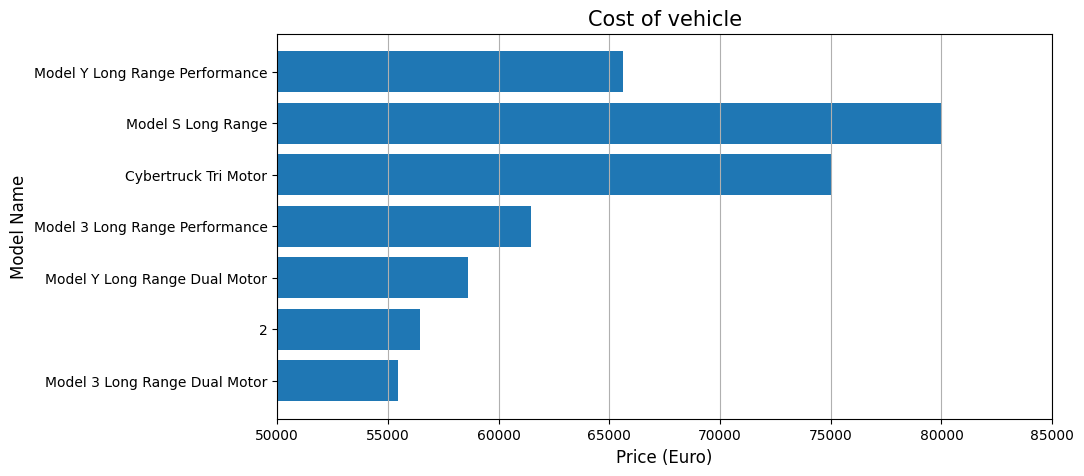

In [20]:
#Filteration according to Price Range

df4 = df3[df3['PriceEuro']>50000] # cost greater than 50000 Euros
df5 =df4[df4['PriceEuro']<80000] # cost less than 80000 Euros

plt.figure(figsize=(10,5))
plt.title("Cost of vehicle",fontsize=15)
plt.xticks(rotation = 0)
plt.grid(axis='x')
plt.xlim(50000,85000)
plt.ylabel("Model Name",fontsize=12)
plt.xlabel("Price (Euro)",fontsize=12)
plt.barh(df5['Model'],df5['PriceEuro'],label='Range')
plt.show()

This shows the top speed of around more than 400KmH is the Roadster which is from tesla and other models are good in top speed


In [14]:
df5.style.hide_index()

<ipython-input-14-bddcda5d917d>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df5.style.hide_index()


Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Tesla,Model 3 Long Range Dual Motor,4.600000,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
Polestar,2,4.700000,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
Tesla,Model Y Long Range Dual Motor,5.100000,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
Tesla,Model 3 Long Range Performance,3.400000,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
Tesla,Cybertruck Tri Motor,3.000000,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
Tesla,Model S Long Range,3.800000,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
Tesla,Model Y Long Range Performance,3.700000,241,410,177,900,Yes,AWD,Type 2 CCS,SUV,D,7,65620


Tesla seems like a good value for money as it performs consistantly on the top 3 and costs significantly less than brands such as lightyera and porsche.
